# Estimation and testing of Fama French’s 5-factor model

In Asset Pricing, the excess return on a stock is broken down as follows:

$$
R_{it}-RF_{t} = \alpha_{i} +\sum_{j=1}^{k} \beta_{i}^{j} f_{jt} + e_{it}
$$
Where
- $R_{it}$ is the return of the stock *i* on date *t*,
- $RF_{t}$ is the risk-free rate on date *t*,
- the $f_{it}, i=1,..,k$ are *k* factors explaining common variations in returns and non-diversifiable risk
- the $\beta_{i}^{j},j=1...,k$ is the exposure of the asset *i* to the factor $f_{jt}$
- $e_{it}$ is the component specific to the asset *i* representing the diversifiable risk with $E(e_{it})=0$

If the factors are correctly chosen, that is to say they represent the variations in expected returns, we will have $\alpha_{i}=0$

**Fama and French (1993)** (Common risk factors in the returns on stocks and bonds, Journal of Financial Economics, 33 (1), pp. 3-56) propose a three-factor model to analyze returns stocks or stock portfolios.
In the 3-factor model, the average return of a stock is assumed to be correlated with:

1. The return on the market portfolio corrected for the risk-free rate: $Mkt-RF$
2. The *Size* of the company measured by its market capitalization (number of shares in circulation $\times$ price of a share).
     - This effect is measured by the factor $SMB_{t}$ equal to the difference in return of a portfolio of small companies minus that of a portfolio of large companies.
3. The book to market ratio *B/M* (ratio of book value and market value). A company with a high B/M ratio will be rather undervalued and is expected to have a high rate of return.
     - This effect is measured by the factor $HML_{t}$ calculated as the difference in returns between portfolios with high and low B/M ratios.

These three factors cannot fully explain the variations in expected returns. **Fama and French (2015)** ('A five-factor asset pricing model', Journal of Financial Economics, 116 1-22) add two additional factors taking into account:

4. The anticipated profitability of companies: higher anticipated earnings tend to increase the rate of return (all other things being equal). The $RMW_{t}$ factor is the difference in returns between a portfolio of companies with high (robust) and low (weak) profitability.
5. Anticipated corporate investments: higher investments tend to reduce the rate of return (less dividends therefore smaller market value). The $CMA_{t}$ factor is the difference between a portfolio of companies with a low level of investment (conservative) and companies with a high level of investment (aggressive)

The objective of this sheet will be to use these factors to estimate the decomposition of the returns of a set of stock portfolios from the NYSE, AMEX and Nasdaq.
We will check to what extent these factors correctly explain the anticipated returns.

    
The data can be found on the Kenneth French website
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
    
    
**In parts III and IV, estimates must be made over the period 1963-07-01 to 2023-07-01**


**You can add your answers (codes, display and comments of results) directly in the notebook. You save it with your name.**

## I. The 5 factors of Fama-French

#### 1. Data import

The Fama-French 5 factor data is stored in the file "F-F_Research_Data_5_Factors_2x3.csv".

Import monthly observations of these factors from "1963-07-01".

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
column_names = ['datetime', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']

data = pd.read_csv('/Users/nathanliesse/Documents/bureau/FAC/M1/info - python/Project_GroupRenzhiLIU/F-F_Research_Data_5_Factors_2x3.csv',
                header=None,
                names=column_names,
                skiprows=4,
                nrows = 723)

print(data)

     datetime  Mkt-RF   SMB   HML   RMW   CMA    RF
0      196307   -0.39 -0.41 -0.97  0.68 -1.18  0.27
1      196308    5.07 -0.80  1.80  0.36 -0.35  0.25
2      196309   -1.57 -0.52  0.13 -0.71  0.29  0.27
3      196310    2.53 -1.39 -0.10  2.80 -2.01  0.29
4      196311   -0.85 -0.88  1.75 -0.51  2.24  0.27
..        ...     ...   ...   ...   ...   ...   ...
718    202305    0.35 -0.38 -7.72 -1.81 -7.22  0.36
719    202306    6.46  1.34 -0.26  2.18 -1.62  0.40
720    202307    3.21  2.86  4.11 -0.57  0.57  0.45
721    202308   -2.39 -3.65 -1.06  3.43 -2.37  0.45
722    202309   -5.24 -1.79  1.52  1.87 -0.82  0.43

[723 rows x 7 columns]


#### 2. Checking for missing variables

In [ ]:
# Checking for missing value. If the sum = 0 there is no missing values.
missing_values = data.isnull().sum()
print(missing_values)

data.info()

#### 3. Date formatting + Risk-free rate

1. Transform dates into dataframe index
2. Store the risk-free rate in a new DataFrame
3. Store the 5 factors presented above in a new DataFrame

In [3]:
# Transform dates into dataframe index
data["datetime"]=pd.to_datetime(data["datetime"],format="%Y%m")

In [4]:
data.set_index('datetime', inplace=True)
data.index.name = None
data.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
1963-07-01,-0.39,-0.41,-0.97,0.68,-1.18,0.27
1963-08-01,5.07,-0.80,1.80,0.36,-0.35,0.25
1963-09-01,-1.57,-0.52,0.13,-0.71,0.29,0.27
1963-10-01,2.53,-1.39,-0.10,2.80,-2.01,0.29
1963-11-01,-0.85,-0.88,1.75,-0.51,2.24,0.27


In [5]:
# Storage of the risk-free rate in a new DataFrame
df_risk_free = data[['RF']]
df_risk_free.head()

,RF
1963-07-01,0.27
1963-08-01,0.25
1963-09-01,0.27
1963-10-01,0.29
1963-11-01,0.27


In [6]:
# Storage of the 5 factors presented above in a new DataFrame
df_factors = data[["Mkt-RF",'SMB','HML','RMW','CMA']]
df_factors.head()

,Mkt-RF,SMB,HML,RMW,CMA
1963-07-01,-0.39,-0.41,-0.97,0.68,-1.18
1963-08-01,5.07,-0.80,1.80,0.36,-0.35
1963-09-01,-1.57,-0.52,0.13,-0.71,0.29
1963-10-01,2.53,-1.39,-0.10,2.80,-2.01
1963-11-01,-0.85,-0.88,1.75,-0.51,2.24


#### 4. Graphical representation of factors

Plot the 5 factors

In [ ]:
df_factors.dtypes

In [7]:
# Conversion of all columns into flat format
df_factors = df_factors.apply(pd.to_numeric)

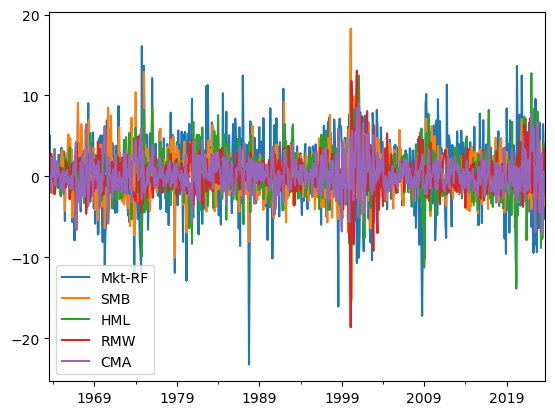

In [8]:
df_factors.plot()
plt.show()

In [ ]:
selected_factor = 'Mkt-RF'
plt.figure(figsize=(12, 8))
plt.plot(data.index, df_factors[selected_factor], linestyle='-', color='blue', label=f'Factor {selected_factor}')
plt.title(f'Line Plot of Factor {selected_factor} Over Time')
plt.xlabel('Date')
plt.ylabel(f'Factor {selected_factor} Values')
plt.legend()
plt.show()

In [ ]:
selected_factor = 'SMB'
plt.figure(figsize=(12, 8))
plt.plot(data.index, df_factors[selected_factor], linestyle='-', color='gold', label=f'Factor {selected_factor}')
plt.title(f'Line Plot of Factor {selected_factor} Over Time')
plt.xlabel('Date')
plt.ylabel(f'Factor {selected_factor} Values')
plt.legend()
plt.show()

In [ ]:
selected_factor = 'HML'
plt.figure(figsize=(12, 8))
plt.plot(data.index, df_factors[selected_factor], linestyle='-', color='green', label=f'Factor {selected_factor}')
plt.title(f'Line Plot of Factor {selected_factor} Over Time')
plt.xlabel('Date')
plt.ylabel(f'Factor {selected_factor} Values')
plt.legend()
plt.show()

In [ ]:
selected_factor = 'RMW'
plt.figure(figsize=(12, 8))
plt.plot(data.index, df_factors[selected_factor], linestyle='-', color='red', label=f'Factor {selected_factor}')
plt.title(f'Line Plot of Factor {selected_factor} Over Time')
plt.xlabel('Date')
plt.ylabel(f'Factor {selected_factor} Values')
plt.legend()
plt.show()

In [ ]:
selected_factor = 'CMA'
plt.figure(figsize=(12, 8))
plt.plot(data.index, df_factors[selected_factor], linestyle='-', color='purple', label=f'Factor {selected_factor}')
plt.title(f'Line Plot of Factor {selected_factor} Over Time')
plt.xlabel('Date')
plt.ylabel(f'Factor {selected_factor} Values')
plt.legend()
plt.show()

#### 5. Descriptive statistics

Calculate the mean, maximum, minimum, standard deviation, skewness, kurtosis for each factor

     - for the entire sample
     - per year
     - per month

In [ ]:
# Calculate the mean, maximum, minimum, standard deviation, skewness, kurtosis for the entire sample
for column_name in df_factors.columns:
    # Calculer les statistiques
    mean_value = df_factors[column_name].mean()
    max_value = df_factors[column_name].max()
    min_value = df_factors[column_name].min()
    std_deviation = df_factors[column_name].std()
    skewness = df_factors[column_name].skew()
    kurtosis = df_factors[column_name].kurtosis()

    # Afficher les résultats
    print("\n")
    print("Le facteur est:", column_name)
    print(f"Mean: {mean_value}")
    print(f"Maximum: {max_value}")
    print(f"Minimum: {min_value}")
    print(f"Standard Deviation: {std_deviation}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")

In [ ]:
# Calculate the mean, maximum, minimum, standard deviation, skewness, kurtosis per year
stats = ["mean", "max", "min", "std", "skew"]

# Loop through each statistic
for stat in stats:
    # Calculate the statistic per year
    annual_stat = df_factors.resample('A').agg({col: stat for col in df_factors.columns})
    
    # Display the results
    print(f"These are the values of the {stat} per year:")
    print(annual_stat)
    print("\n")

In [ ]:
# Définir une fonction personnalisée pour calculer le kurtosis
def custom_kurtosis(x):
    return pd.Series(x).kurt()

# Calculer le kurtosis avec une fréquence annuelle ('A')
annual_kurtosis = data.resample('A').agg(custom_kurtosis)

# Afficher les résultats
print("Kurtosis per year:")
print(annual_kurtosis)

In [ ]:
for stat in stats:
    # Calculate the statistic per year
    if stat == "kurt":
        annual_stat = df_factors.resample('A').apply(pd.DataFrame.kurt)
    else:
        annual_stat = df_factors.resample('A').agg({col: stat for col in df_factors.columns})
    
    # Display the results
    print(f"These are the values of the {stat} per year:")
    print(annual_stat)
    print("\n")

In [ ]:
# Loop through each statistic
stats = ['mean','max','min']

for stat in stats:
    monthly_stat = df_factors.resample('M').agg({col: stat for col in df_factors.columns})
    
    # Display the results
    print(f"These are the values of the {stat} per month:")
    print(monthly_stat)
    print("\n")

print('These are the values of the standard deviation per month.')
df_factors.groupby(df_factors.index.month).apply(pd.DataFrame.std)


In [ ]:
print('These are the values of the skewness per month.')
df_factors.groupby(df_factors.index.month).apply(pd.DataFrame.skew)

In [ ]:
print('These are the values of the skewness per month.')
df_factors.groupby(df_factors.index.month).apply(pd.DataFrame.kurt)

#### 6. Correlation matrix
1. Estimate the factor correlation matrix and comment
2. Make a graphical representation of this matrix
3. Check the significance of the correlation between the factors $HML$ and $SMB$

In [ ]:
# Calculate the factor correlation matrix
factor_corr_matrix = df_factors.corr()

# Display the factor correlation matrix
print("Factor Correlation Matrix:")
print(factor_corr_matrix)

In [ ]:
sns.heatmap(factor_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Factor Correlation Matrix')
plt.show()

In [ ]:
from scipy import stats


cor, pvalue = stats.pearsonr(df_factors['HML'].to_numpy(),
               df_factors['SMB'].to_numpy())
print("The correlation between HML and SMB is", cor)
print("The pvalue of the correlation is", pvalue)

step = 0.5
if pvalue < step:
    print("Correlation between HML and SMB is significant")
else:
    print("The correlation between HML and SMB is not significant")

## II. The 25 portfolios formed from Size and OP

We import the returns of 25 portfolios formed from NYSE, AMEX and NASDAQ securities for which we have all the quotations.
These shares are divided into 25 portfolios obtained by crossing the *Size*
- divided into 5 categories of SMALL or ME1/ME2/ME3/ME4/BIG or ME5

and the ratio *OP* : Operating Profitability
 
- divided into 5 categories of LoOP or OP1/OP2/OP3/OP4/HiOP or OP5

This data can be found in the file "25_Portfolios_ME_OP_5x5_Wout_Div.CSV"

#### 1. Data import

1. Import the data
2. Transform the dates into yyyy-mm-01 format (example 196307 becomes 1963-07-01)
3. Transform dates into indices

In [9]:
column_names = ['datetime','SMALL LoOP','ME1 OP2', 'ME1 OP3','ME1 OP4',
               'SMALL HiOP','ME2 OP1', 'ME2 OP2', 'ME2 OP3','ME2 OP4','ME2 OP5',
               'ME3 OP1', 'ME3 OP2', 'ME3 OP3','ME3 OP4','ME3 OP5',
               'ME4 OP1', 'ME4 OP2', 'ME4 OP3','ME4 OP4','ME4 OP5',
               'BIG LoOP','ME5 OP2','ME5 OP3','ME5 OP4','BIG HiOP']

data_25_Portfolio = pd.read_csv('/Users/nathanliesse/Documents/bureau/FAC/M1/info - python/Project_GroupRenzhiLIU/25_Portfolios_ME_OP_5x5_Wout_Div.csv',
                header=None,
                names = column_names,
                skiprows=23,
                encoding='latin1',
                nrows = 723)

print(data_25_Portfolio)

     datetime  SMALL LoOP  ME1 OP2  ME1 OP3  ME1 OP4  SMALL HiOP  ME2 OP1  \
0      196307     -0.6705   1.2181   2.4664  -0.9614     -1.1993  -1.2551   
1      196308      2.1994   3.6919   2.2153   2.3272      4.0410   6.2016   
2      196309     -1.5825  -1.1712  -2.2143   4.0691     -1.6038  -1.9994   
3      196310      0.1584  -1.0551   1.1348   3.0337      0.2181   3.5349   
4      196311     -2.3473  -1.7879  -3.6168  -2.6146     -3.3887  -1.6161   
..        ...         ...      ...      ...      ...         ...      ...   
718    202305      2.8277  -2.1309  -0.2376  -1.8709     -0.3256   3.3698   
719    202306      3.1023   9.3744   7.5732   9.8428      9.8191   6.4446   
720    202307      4.5380   7.3617   9.4589   8.3435      8.6348   5.3241   
721    202308    -10.9330  -3.9924  -5.8769  -6.7043     -6.1876  -8.3390   
722    202309     -9.0552  -4.6907  -4.9288  -4.8163     -1.7269  -9.1260   

     ME2 OP2  ME2 OP3  ME2 OP4  ...  ME4 OP1  ME4 OP2  ME4 OP3  ME4 OP4  \


In [ ]:
data_25_Portfolio.info()

In [10]:
# Transform dates into dataframe index
data_25_Portfolio['datetime'] = pd.to_datetime(data_25_Portfolio['datetime'], format='%Y%m')

data_25_Portfolio.set_index('datetime', inplace=True)
data_25_Portfolio.index.name = None
data_25_Portfolio.head()

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,SMALL HiOP,ME2 OP1,ME2 OP2,ME2 OP3,ME2 OP4,ME2 OP5,...,ME4 OP1,ME4 OP2,ME4 OP3,ME4 OP4,ME4 OP5,BIG LoOP,ME5 OP2,ME5 OP3,ME5 OP4,BIG HiOP
1963-07-01,-0.6705,1.2181,2.4664,-0.9614,-1.1993,-1.2551,-2.1457,-1.1506,0.6419,0.3073,...,-3.6017,-0.6540,-2.1827,-1.4483,-0.0358,0.2036,1.3578,-0.0689,-1.1041,0.6455
1963-08-01,2.1994,3.6919,2.2153,2.3272,4.0410,6.2016,5.4030,3.4699,4.6566,3.5437,...,4.8709,4.9670,5.9343,4.1942,6.2595,4.1981,3.6953,4.7542,5.3736,5.4765
1963-09-01,-1.5825,-1.1712,-2.2143,4.0691,-1.6038,-1.9994,-1.9601,-0.0890,-2.5102,-4.2698,...,-1.9026,-1.4033,-2.5062,-3.0080,-2.4167,-2.5485,-2.3196,0.8222,-2.0080,-1.3054
1963-10-01,0.1584,-1.0551,1.1348,3.0337,0.2181,3.5349,2.9549,1.0929,-1.4399,4.6419,...,2.9412,0.2448,1.6633,-0.8305,2.9515,-0.1189,-0.1349,2.2829,2.9912,7.7337
1963-11-01,-2.3473,-1.7879,-3.6168,-2.6146,-3.3887,-1.6161,-0.7255,-0.3999,-1.6184,-2.3957,...,-0.5446,-1.5143,-0.5209,-0.7213,0.3579,-1.6703,-1.8024,0.7283,0.3042,-3.8383


#### 2. Calculate the excess returns $R_{it} -RF_{t}$

In [11]:
# Initialize a new DataFrame for excess returns
df_excess_returns = pd.DataFrame(index=data_25_Portfolio.index)

# Calculate excess returns for each asset and add to the new DataFrame
for column in data_25_Portfolio.columns:
    asset_name = column
    df_excess_returns[f'{asset_name}'] = data_25_Portfolio[column] - df_risk_free['RF']

# Display the new DataFrame with excess returns
print(df_excess_returns)

rows_df_excess_returns, columns_df_excess_returns = df_excess_returns.shape


            SMALL LoOP  ME1 OP2  ME1 OP3  ME1 OP4  SMALL HiOP  ME2 OP1  \
1963-07-01     -0.9405   0.9481   2.1964  -1.2314     -1.4693  -1.5251   
1963-08-01      1.9494   3.4419   1.9653   2.0772      3.7910   5.9516   
1963-09-01     -1.8525  -1.4412  -2.4843   3.7991     -1.8738  -2.2694   
1963-10-01     -0.1316  -1.3451   0.8448   2.7437     -0.0719   3.2449   
1963-11-01     -2.6173  -2.0579  -3.8868  -2.8846     -3.6587  -1.8861   
...                ...      ...      ...      ...         ...      ...   
2023-05-01      2.4677  -2.4909  -0.5976  -2.2309     -0.6856   3.0098   
2023-06-01      2.7023   8.9744   7.1732   9.4428      9.4191   6.0446   
2023-07-01      4.0880   6.9117   9.0089   7.8935      8.1848   4.8741   
2023-08-01    -11.3830  -4.4424  -6.3269  -7.1543     -6.6376  -8.7890   
2023-09-01     -9.4852  -5.1207  -5.3588  -5.2463     -2.1569  -9.5560   

            ME2 OP2  ME2 OP3  ME2 OP4  ME2 OP5  ...  ME4 OP1  ME4 OP2  \
1963-07-01  -2.4157  -1.4206   0.3719 

#### 3. Calculation of descriptive statistics

Calculate the average returns for each portfolio. What can you say about the relationship between average yield and
- the *Size* ?
- the *OP* ?

In [12]:
average_returns = data_25_Portfolio.mean(axis=0)

# Create a new DataFrame for average returns
df_average_returns = pd.DataFrame({'Average Returns': average_returns})

# Display the new DataFrame with average returns
df_average_returns

,Average Returns
SMALL LoOP,0.805521
ME1 OP2,1.133213
ME1 OP3,1.063341
ME1 OP4,1.215467
SMALL HiOP,1.073039
ME2 OP1,0.831554
ME2 OP2,0.948523
ME2 OP3,0.964448
ME2 OP4,0.984684
ME2 OP5,1.175385


## III. Estimation of the factor model


For each asset *i*, we have T observations ${r_{i1},...,r_{iT}}$. We can estimate the following three regressions:
    
### Regression on the market factor
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+e_{it}$$

### Regression on the 3 factors
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+s_{i}SMB_{t}+h_{i}HML_{ t}+e_{it}$$

### Regression on the 5 factors
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+s_{i}SMB_{t}+h_{i}HML_{ t}+r_{i}RMW_{t}+c_{i}CMA_{t}+e_{it}$$

- $R_{Ft}$ is the risk-free rate
- $R_{MT}$ is the market portfolio rate of return
- The residual $e_{it}$ represents the idiosyncratic risk (or diversifiable risk) of each asset.
- $\beta_{i}, s_{i}, h_{i},r_{i}, c_{i}$ represent the exposures to each of the factors
- $\alpha_{i}$ is the constant. According to efficient portfolio theory, we expect to have $a_{i}=0$. This hypothesis can also be justified by the proposition that all the factors represent all the risk factors.

#### 1. Construct a function to estimate these three regressions. You will keep as output:

1. the estimated coefficients
2. the tstat of the estimated coefficients
3. the residuals of the regressions
4. The average of constants in absolute value

In [50]:
def results_regressions(df_excess_returns, data):
    
    #Initialization of the constante to 0 for all the regressions
    cst_1factor = 0
    cst_3factors = 0
    cst_5factors = 0
    
    #Creation of the dataframes for all the regressions
    results_1factor = pd.DataFrame(index=['constant', 'tstats_cst','beta_Mkt-RF','tstats_Mkt-RF'], columns=df_excess_returns.columns)
    results_3factors = pd.DataFrame(index = ['constant','tsats_cst','beta_Mkt-RF','tstats_Mkt-RF','beta_SMB','tstats_SMB','beta_HML','tstats_HML'], columns = df_excess_returns.columns)
    results_5factors = pd.DataFrame(index=['constant','tsats_cst','beta_Mkt-RF','tstats_Mkt-RF','beta_SMB','tstats_SMB','beta_HML','tstats_HML','beta_RMW','tstats_RMW','beta_CMA','tstats_CMA'], columns = df_excess_returns.columns)
    
    #Creation of the dataframes for all the resid value
    resid_1factor = pd.DataFrame(index=df_excess_returns.index, columns=df_excess_returns.columns)
    resid_3factors = pd.DataFrame(index=df_excess_returns.index, columns=df_excess_returns.columns)
    resid_5factors = pd.DataFrame(index=df_excess_returns.index, columns=df_excess_returns.columns)
    
    #Creation of the dependent varibale (y) and the independent one (x)
    for asset in df_excess_returns.columns :
        y = df_excess_returns[asset]
        X_1factor = sm.add_constant(data['Mkt-RF'])
        
        #Regression for the one factor model
        model_1factor = sm.OLS(y, X_1factor).fit()
        
        #Print the one factor regression results
        results_1factor.loc['constant',asset] = model_1factor.params['const']
        results_1factor.loc['tstats_cst',asset] = model_1factor.tvalues['const']
        results_1factor.loc['beta_Mkt-RF',asset] = model_1factor.params['Mkt-RF']
        results_1factor.loc['tstats_Mkt-RF',asset] = model_1factor.tvalues['Mkt-RF']
        #results_1factor.at['resid',asset] = model_1factor.resid[0]
        
        print(resid_1factor.head())

        for j in resid_1factor.index:
          #  print(j, type(j))
            resid_1factor.loc[j, asset] = model_1factor.resid[j]
        cst_1factor += np.abs(model_1factor.params['const'])
        
        #Regression for the three factors model
        X_3factors = sm.add_constant(data[['Mkt-RF','SMB','HML']])
        model_3factors = sm.OLS(y,X_3factors).fit()
        
        #Print the 3 factor regression results
        results_3factors.loc['constant',asset] = model_3factors.params['const']
        results_3factors.loc['tstats_cst',asset] = model_3factors.tvalues['const']
        results_3factors.loc['beta_Mkt-RF',asset] = model_3factors.params['Mkt-RF']
        results_3factors.loc['tstats_Mkt-RF',asset] = model_3factors.tvalues['Mkt-RF']
        results_3factors.loc['beta_SMB', asset] = model_3factors.params['SMB']
        results_3factors.loc['tstats_SMB',asset] = model_3factors.tvalues['SMB']
        results_3factors.loc['beta_HML',asset] = model_3factors.params['HML']
        results_3factors.loc['tstats_HML',asset] = model_3factors.tvalues['HML']
    
        for j in resid_3factors.index:
            resid_3factors.loc[j, asset] = model_3factors.resid[j]
            print("apres", resid_3factors.loc[j, asset])
        print(resid_3factors)
        cst_3factors += np.abs(model_3factors.params['const'])
        
        #Regression for the five factors model
        X_5factors = sm.add_constant(data[['Mkt-RF','SMB','HML','RMW','CMA']])
        model_5factors = sm.OLS(y,X_5factors).fit()

        
        #Print the five factor regression results
        results_5factors.loc['constant',asset] = model_5factors.params['const']
        results_5factors.loc['tstats_cst',asset] = model_5factors.tvalues['const']
        results_5factors.loc['beta_Mkt-RF',asset] = model_5factors.params['Mkt-RF']
        results_5factors.loc['tstats_Mkt-RF',asset] = model_5factors.tvalues['Mkt-RF']
        results_5factors.loc['beta_SMB', asset] = model_5factors.params['SMB']
        results_5factors.loc['tstats_SMB',asset] = model_5factors.tvalues['SMB']
        results_5factors.loc['pvalue_SMB', asset] = model_5factors.pvalues['SMB']        
        results_5factors.loc['beta_HML',asset] = model_5factors.params['HML']
        results_5factors.loc['tstats_HML', asset] = model_5factors.tvalues['HML']
        results_5factors.loc['pvalue_HML', asset] = model_5factors.pvalues['HML']
        results_5factors.loc['beta_RMW', asset] = model_5factors.params['RMW']
        results_5factors.loc['tstats_RMW', asset] = model_5factors.tvalues['RMW']
        results_5factors.loc['pvalue_RMW', asset] = model_5factors.pvalues['RMW']
        results_5factors.loc['beta_CMA', asset] = model_5factors.params['CMA']
        results_5factors.loc['tstats_CMA', asset] = model_5factors.tvalues['CMA']
        results_5factors.loc['pvalue_CMA', asset] = model_5factors.pvalues['CMA']
        
        for j in resid_5factors.index:
            resid_5factors.loc[j, asset] = model_5factors.resid[j]

        cst_5factors += np.abs(model_5factors.params['const'])
        

    mean_cst_abs_1factor = cst_1factor / columns_df_excess_returns
    mean_cst_abs_3factors = cst_3factors / columns_df_excess_returns
    mean_cst_abs_5factors = cst_5factors / columns_df_excess_returns
    
    return results_1factor, mean_cst_abs_1factor, resid_1factor, results_3factors, mean_cst_abs_3factors, resid_3factors, results_5factors, mean_cst_abs_5factors, resid_5factors
        

In [51]:
results_1factor, mean_cst_abs_1factor, resid_1factor, results_3factors, mean_cst_abs_3factors, resid_3factors, results_5factors, mean_cst_abs_5factors, resid_5factors = results_regressions(df_excess_returns, data)


           SMALL LoOP ME1 OP2 ME1 OP3 ME1 OP4 SMALL HiOP ME2 OP1 ME2 OP2  \
1963-07-01        NaN     NaN     NaN     NaN        NaN     NaN     NaN   
1963-08-01        NaN     NaN     NaN     NaN        NaN     NaN     NaN   
1963-09-01        NaN     NaN     NaN     NaN        NaN     NaN     NaN   
1963-10-01        NaN     NaN     NaN     NaN        NaN     NaN     NaN   
1963-11-01        NaN     NaN     NaN     NaN        NaN     NaN     NaN   

           ME2 OP3 ME2 OP4 ME2 OP5  ... ME4 OP1 ME4 OP2 ME4 OP3 ME4 OP4  \
1963-07-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
1963-08-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
1963-09-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
1963-10-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
1963-11-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   

           ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 OP4 BIG HiOP  
1963-07-01     NaN      NaN  

apres -1.1690517378305527
apres 1.3096042270771067
apres -0.5360276324347
apres 0.4151919491227023
apres -2.333971917168914
apres -1.3623593773948421
apres 1.097002441800071
apres 0.504845295899728
apres -3.444163813377112
apres 3.464588167960972
apres 1.7477527285016157
apres -0.5324609430065097
apres -0.8005025307291564
apres -4.058381244843524
apres -0.3831128510291668
apres 0.80784338404075
apres -1.5223961052056207
apres 0.7563563164123135
apres 0.752410934046635
apres 0.4152563877096407
apres -2.7992821935529264
apres 0.9172343617598717
apres -0.7801669280719894
apres 2.123025045750296
apres 2.1088829917213285
apres 2.342054385097729
apres 1.0729874054466249
apres 2.5317988471787043
apres -0.5279093291017318
apres -0.6158547867132018
apres -0.49643382964810256
apres 2.7002882822353973
apres -1.7735080556265022
apres 5.387196263350777
apres 4.019903575986874
apres 0.17505091436512732
apres -1.1383233362471437
apres 0.10432142746598272
apres -1.3739597738910465
apres 1.824398861971

apres 2.0318303824254818
apres -0.7375240368691185
apres 0.5027784113404212
apres -2.092458808173301
apres -0.8393303184947718
apres -0.7902947879089888
apres 1.480477519011182
apres -2.3329921011225494
apres -1.432580995464125
apres 2.765236534721478
apres -1.9641094666468182
apres -0.24834755776624928
apres 2.1479480715826926
apres -0.32561690178473734
apres 2.133529051166115
apres -0.378431877379074
apres 0.3122708272483302
apres -1.571064064446505
apres 1.5983312522310076
apres -2.204761425192888
apres 2.185490167929742
apres 1.1570938299127596
apres -0.6303012571991544
apres -0.6205906404480324
apres -2.3418878242590733
apres -2.967417299268928
apres -0.6784281178347866
apres -0.0020072057655422526
apres 0.07018932019661506
apres -1.7896396516174509
apres 2.0805048186075012
apres 3.7387113065185393
apres 2.519031133015652
apres -3.332270293052905
apres 0.0950568707546271
apres -2.231621885078674
apres -0.48531164175227737
apres -1.7065949743980937
apres -1.3396097905099515
apres -

           SMALL LoOP   ME1 OP2 ME1 OP3 ME1 OP4 SMALL HiOP ME2 OP1 ME2 OP2  \
1963-07-01  -0.182516  1.174282     NaN     NaN        NaN     NaN     NaN   
1963-08-01  -4.225908 -2.087024     NaN     NaN        NaN     NaN     NaN   
1963-09-01   0.403888   0.02876     NaN     NaN        NaN     NaN     NaN   
1963-10-01  -3.081531  -4.19674     NaN     NaN        NaN     NaN     NaN   
1963-11-01  -1.275193 -1.346855     NaN     NaN        NaN     NaN     NaN   

           ME2 OP3 ME2 OP4 ME2 OP5  ... ME4 OP1 ME4 OP2 ME4 OP3 ME4 OP4  \
1963-07-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
1963-08-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
1963-09-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
1963-10-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
1963-11-01     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   

           ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 OP4 BIG HiOP  
1963-07-01     Na

apres 2.4317183877793798
apres -0.9805296699327454
apres -1.9091984342777044
apres -3.1041089577185437
apres -0.13618417421091822
apres 1.4394469798666236
apres -2.366437439801406
apres -0.2665313373137793
apres -0.6813755856046901
apres 0.4725688692128074
apres 0.9858706655985161
apres -1.9682147002366768
apres -0.09220546480559733
apres -0.6713598409051321
apres 1.1028740932654424
apres -1.2945119034545307
apres 0.2985345916538815
apres 0.6933704994818868
apres -0.05886278680192525
apres -0.6617121791428571
apres 0.028862783885872156
apres -0.3204475467668466
apres 0.048623762639398826
apres 0.6854672928545935
apres -0.14524388410973166
apres 0.33376201970640196
apres 1.7153832266824232
apres -1.859566034344886
apres -1.175235372685417
apres 0.07006648164336937
apres -1.168836476812919
apres -0.017582118154422788
apres 0.7217647671190415
apres 0.689875079624501
apres -0.5783948190103025
apres -2.2915661615358447
apres 0.46525330339041787
apres -0.40176695643156
apres -1.0426694943093

apres -0.13914595652561412
apres -2.459135389217433
apres 5.735842630691877
apres 1.8265552002449321
apres -1.7947634307160794
apres -0.5832264540383081
apres 1.4467089791168664
apres -1.5497865517100569
apres -1.6915662186709772
apres 4.000328656437997
apres -1.9141678913025237
apres 0.3779047517815157
apres 0.012055256718606966
apres -0.67270468964385
apres 1.4980523112626005
apres -0.004195720919175194
apres 0.3506071383679
apres 0.83522850106388
apres 2.088502761808539
apres -1.2752729952011936
apres -1.8547268302624786
apres -0.7812509173821827
apres 0.7001070060214709
apres -0.12301880396260856
apres -0.8667094885231434
apres -1.3571434207354782
apres -0.1386199844650533
apres -0.03298166615398923
apres 0.3998984649413275
apres -2.4684836791387377
apres 1.7185386527389976
apres 0.7760835241635489
apres -0.6148859234981376
apres 2.4274797159158803
apres -0.5565691242747128
apres 2.549102798549258
apres 0.4891330177869495
apres 0.3130087005704052
apres -0.0037092903798237042
apres 

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842        NaN     NaN   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293        NaN     NaN   
1963-09-01   0.403888   0.02876 -0.988666  5.244409        NaN     NaN   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685        NaN     NaN   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715        NaN     NaN   

           ME2 OP2 ME2 OP3 ME2 OP4 ME2 OP5  ... ME4 OP1 ME4 OP2 ME4 OP3  \
1963-07-01     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-08-01     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-09-01     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-10-01     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-11-01     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   

           ME4 OP4 ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 OP4 BIG HiOP  
1963-07-01     NaN     NaN      N

apres 1.0486028379830463
apres -0.5972324633269294
apres -1.3884220645744967
apres -1.6259615513811152
apres -0.12743945124459266
apres 0.6982410902451139
apres 0.9915057460358572
apres -0.11344495037450364
apres 2.08727791617038
apres 0.38955226738522697
apres -4.7833795001526
apres -1.6022544660797011
apres 0.255294210549204
apres -0.7818199433725859
apres 3.7607034593184165
apres 3.253022996509423
apres -3.7708576095698128
apres 0.03816611697069483
apres -0.8431996482506938
apres -3.2324225490384806
apres 3.8412754988220703
apres 2.169102533644463
apres -0.3877343872273318
apres -1.0555881511767353
apres -2.2745632161400113
apres 8.477938094435524
apres -9.395619951136641
apres -13.877808284427813
apres 5.380410779953733
apres 1.0498792327128896
apres 0.17274637878479382
apres -8.28769384127202
apres 2.4862286256903343
apres 2.4461212412070807
apres 0.2755108722512096
apres -0.7006934360896242
apres 2.7237599563635406
apres -6.203110124470132
apres 4.6900001342028546
apres 2.9205390

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842  -0.975926     NaN   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293  -2.665709     NaN   
1963-09-01   0.403888   0.02876 -0.988666  5.244409   0.121607     NaN   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685   -3.29542     NaN   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715  -2.579787     NaN   

           ME2 OP2 ME2 OP3 ME2 OP4 ME2 OP5  ... ME4 OP1 ME4 OP2 ME4 OP3  \
1963-07-01     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-08-01     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-09-01     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-10-01     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-11-01     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   

           ME4 OP4 ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 OP4 BIG HiOP  
1963-07-01     NaN     NaN      N

apres 0.10502143705344258
apres 1.82097454337812
apres 0.23721306328765612
apres 1.1296713060054762
apres 0.4565088341504362
apres -1.4706791551013936
apres 0.39005661044185724
apres 0.24389270296071452
apres -1.3598903078489926
apres 4.055574004890292
apres 2.6870017115715092
apres 1.4512913257690698
apres -0.7139623820767755
apres -0.8651888407266388
apres 1.9928292902997473
apres 1.6672865808431236
apres -0.9483868497783714
apres -1.6225954091170625
apres -0.1818145493863792
apres -0.5600374134028274
apres 0.9205740286576005
apres -1.4893550087591287
apres -0.055435470382386276
apres -2.1862489525099664
apres -1.1905656967739935
apres -1.350744311695558
apres -2.3943572510309545
apres 0.9036964618202354
apres -2.108591895807672
apres -0.7522378420189453
apres -0.4157308767921686
apres -0.3396428777847129
apres -0.5640016748499583
apres -1.186177561371713
apres 0.4576900884440538
apres -0.7777475079529681
apres -0.16965356689733202
apres 1.035392935886751
apres -0.8451772117696259
ap

apres -1.2541220580759045
apres 0.501575369191813
apres -0.05802885069611996
apres 1.4867441280987894
apres 0.36197894565964717
apres -0.661250179107977
apres -0.5433050119192544
apres -1.3623890219641814
apres 2.591656851777493
apres -1.9994764314690272e-05
apres -0.6985705911349264
apres 0.1646008466485982
apres -0.3509878610665862
apres -1.4396240901826398
apres -0.6510437785641849
apres -0.5412224734733797
apres 0.5878992578612932
apres 2.371603312870107
apres -0.8617707067916047
apres -1.6859930809002799
apres -1.1256282605250854
apres -0.9720912781987021
apres 2.8325478736218597
apres 0.6200536206086316
apres 0.10511822778979019
apres 0.8182996721325795
apres 1.300465917821474
apres 0.6701105611832849
apres 0.10444753541670737
apres -0.667155856630496
apres 1.804201492275694
apres -1.8122184103210905
apres -2.1432160044564452
apres 1.8999265743228317
apres -0.0014951003013248254
apres 0.6859897115799359
apres 2.2044938892618218
apres -0.4013270102050246
apres -0.43827285713622954

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842  -0.975926 -0.728363   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293  -2.665709 -0.558923   
1963-09-01   0.403888   0.02876 -0.988666  5.244409   0.121607  0.106561   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685   -3.29542  0.133725   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715  -2.579787 -0.473733   

             ME2 OP2 ME2 OP3 ME2 OP4 ME2 OP5  ... ME4 OP1 ME4 OP2 ME4 OP3  \
1963-07-01 -1.940823     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-08-01 -0.496688     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-09-01 -0.431599     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-10-01 -0.135631     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1963-11-01 -0.004634     NaN     NaN     NaN  ...     NaN     NaN     NaN   

           ME4 OP4 ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 OP4 BIG HiOP  
1963-07-0

apres 1.614980431666451
apres -0.3283511402988899
apres -1.0848588920738624
apres -0.47824365027195626
apres 0.06999271342220226
apres -1.101751939531292
apres -2.6280326069228863
apres -1.01828112993738
apres -1.1505553654454985
apres -1.2915460339962461
apres 0.00043174085518593586
apres 2.479089224759983
apres -0.3408019221659928
apres -0.03771093987079155
apres 0.35500063115525693
apres -2.186550137784028
apres 0.341518292057172
apres -0.7177765151279996
apres 1.5978744774186584
apres 0.5851642131560837
apres -0.35888809956372114
apres 0.6755217875023583
apres 0.8149671117342407
apres 0.7589207649326095
apres 1.1131186995177766
apres -1.3672603346784413
apres 0.1159592013640971
apres 2.442138014342488
apres 1.6284593251922366
apres 1.2112921917841963
apres 0.5398764429564522
apres 0.8094506936708753
apres 0.25265843333618676
apres 0.821053334482194
apres 0.6708317228492398
apres 0.9363960135752976
apres 0.8219663248838204
apres -0.24611403557269923
apres -0.429890766066932
apres 0.

apres 1.470904256683974
apres -0.2508663240085225
apres -0.674381685307226
apres -2.9572503785342197
apres -0.5861156946967652
apres -1.4134382448018457
apres -1.3975277560532324
apres -3.1786941458910976
apres -0.34825997908581163
apres -1.1176732904075226
apres -2.3568986477565916
apres -3.045717759043228
apres -0.9884988935151948
apres 2.1921538265362552
apres -4.443936324185248
apres -0.1724019035824289
apres -2.138117749019352
apres 1.9098941929111555
apres 1.2663889019314087
apres 0.20277544405547498
apres 0.1862155472942313
apres -1.966422862714937
apres 1.196062788374866
apres -2.469022885344435
apres -0.7443750293236122
apres -2.2569451407908496
apres 0.5956344327563681
apres -3.450265022913688
apres -3.301485819637716
apres -1.2344126151548767
apres -4.970938864164689
apres -3.174439247453267
apres -1.2225110927440275
apres -3.518643214299428
apres -0.44552410037347556
apres -2.1633102640140542
apres -1.93968061979336
apres -0.5356633380472662
apres -0.3177219905855053
apres 

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842  -0.975926 -0.728363   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293  -2.665709 -0.558923   
1963-09-01   0.403888   0.02876 -0.988666  5.244409   0.121607  0.106561   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685   -3.29542  0.133725   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715  -2.579787 -0.473733   

             ME2 OP2   ME2 OP3   ME2 OP4 ME2 OP5  ... ME4 OP1 ME4 OP2 ME4 OP3  \
1963-07-01 -1.940823 -1.041251  0.801013     NaN  ...     NaN     NaN     NaN   
1963-08-01 -0.496688  -2.06582 -1.233416     NaN  ...     NaN     NaN     NaN   
1963-09-01 -0.431599  1.244668 -1.039444     NaN  ...     NaN     NaN     NaN   
1963-10-01 -0.135631 -1.847421 -4.546548     NaN  ...     NaN     NaN     NaN   
1963-11-01 -0.004634  0.186726 -0.947968     NaN  ...     NaN     NaN     NaN   

           ME4 OP4 ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 

apres 5.258772359981097
apres 0.2664557874893667
apres -3.500892047267044
apres 2.997841889074028
apres -0.15371993883737334
apres -2.627081823755021
apres 1.802636627248468
apres -2.757235456355636
apres 3.938102471666239
apres -0.20077283205408492
apres -1.9533149954183013
apres 6.246745160557714
apres 3.371817042517836
apres -1.3654374528587327
apres -1.8323872526924472
apres -1.1118182150609872
apres 3.0807153407893857
apres 0.5258402848666996
apres -1.7404518894194796
apres -0.8766369801237843
apres -0.024197884980841522
apres -0.2424405807916914
apres 0.4526992575632729
apres -2.0617957211116096
apres 2.161444577757838
apres -1.5292766912304407
apres 0.6263608069547422
apres -1.142021437176755
apres 0.8194208703132924
apres 3.294440558538125
apres 0.26840256797146766
apres -1.3313534544118095
apres -0.7651629017327224
apres 1.1864961146365154
apres -0.9835646749801548
apres -1.6661808975566221
apres -0.35131485497551207
apres -1.0242850392812426
apres -2.959593836483967
apres 0.7

apres -0.6554369802717506
apres 1.5980890554313438
apres 1.2658000518054773
apres 0.020120061524577126
apres 0.44720723332282875
apres 1.188093792489366
apres 1.6738045293534263
apres 1.3930152798098323
apres 6.087177045385681
apres -0.7775767546860313
apres 0.567451998082774
apres -0.040260255573554726
apres -1.269474350743724
apres -0.39124636853435435
apres -1.3152775003329034
apres 0.4876860505401015
apres -2.6288459215320805
apres -0.9629482793520716
apres 0.6395631574124021
apres 0.6625819228400416
apres -0.35726917642940803
apres 1.1556597033874967
apres -2.279800574432328
apres 0.06844319693190215
apres 1.88670637560664
apres 0.12765523201881024
apres -0.4980401643058916
apres -0.7491916144139452
apres -2.172579715344228
apres -1.0010465188004765
apres 3.077339463412501
apres -0.6648002821422629
apres -3.3231081594434437
apres -1.086465473537202
apres 1.4599036712558178
apres -0.3690724444411764
apres 2.2559714182557906
apres 3.9490023975964377
apres 0.6082233230917877
apres 2.

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842  -0.975926 -0.728363   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293  -2.665709 -0.558923   
1963-09-01   0.403888   0.02876 -0.988666  5.244409   0.121607  0.106561   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685   -3.29542  0.133725   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715  -2.579787 -0.473733   

             ME2 OP2   ME2 OP3   ME2 OP4   ME2 OP5  ... ME4 OP1 ME4 OP2  \
1963-07-01 -1.940823 -1.041251  0.801013  0.403693  ...     NaN     NaN   
1963-08-01 -0.496688  -2.06582 -1.233416 -3.147786  ...     NaN     NaN   
1963-09-01 -0.431599  1.244668 -1.039444 -2.702107  ...     NaN     NaN   
1963-10-01 -0.135631 -1.847421 -4.546548   1.07745  ...     NaN     NaN   
1963-11-01 -0.004634  0.186726 -0.947968 -1.725749  ...     NaN     NaN   

           ME4 OP3 ME4 OP4 ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 OP4 BIG HiOP  
1963-07-01   

apres 3.2150073298769164
apres -0.44276375645073873
apres -0.003261881615896023
apres -0.8315778136035519
apres 1.4050396522068214
apres 0.5630421107482887
apres 4.081063359479852
apres 0.24077730971799127
apres 0.750344983181968
apres -0.608125983418871
apres 0.5102025036236473
apres -3.734809133576751
apres -0.21971442648882444
apres 2.5741794034828036
apres -0.07627248354277771
apres 3.568829165435087
apres 0.18324797555951733
apres -1.1852808771872034
apres -1.55202075138976
apres -1.093983043020598
apres 1.9796357658855754
apres 0.062093034696832916
apres -0.4788566735374742
apres 0.6351710983805772
apres 1.4131636043113822
apres -0.31516527417936535
apres 2.6672863019268
apres -0.5493342907582326
apres 0.3871112047140475
apres -0.5065569910866117
apres -1.0623798888286702
apres 0.5147679973986641
apres 1.751156510948367
apres 0.7063300365781622
apres 0.5666094620032034
apres 1.8095035676006255
apres 0.5632084868844953
apres 2.5177255378308625
apres -0.1751768250412331
apres 1.485

apres 0.9646572601150563
apres -1.5089426658411624
apres -0.6092445134986046
apres 0.8158713463091105
apres -2.0081438958661755
apres -1.6183107964237922
apres -1.7578987549301885
apres -0.6008283397058969
apres -1.6191880386593154
apres 1.484783781134929
apres -0.36386847328584815
apres 1.8951517795314816
apres 0.8783633788394751
apres -0.42720902216681056
apres -0.9597159377490609
apres 0.3202749624687835
apres -0.08210785892485817
apres 0.5355904230331374
apres -1.0912922454640572
apres 2.7445377475836263
apres -0.38194653308944826
apres 0.15270320562919215
apres -1.4145141659102387
apres -0.9724511763066479
apres -0.4632923413101473
apres 1.3966196630299113
apres 0.8908188012651941
apres -0.8101324107859571
apres 0.7004582798811789
apres 0.35011992041389295
apres -1.1432569382435553
apres 0.9990777036539498
apres 1.0338848343749825
apres -0.14121849925833763
apres -1.4300262883229138
apres 0.9807143488370992
apres -0.4455612653939707
apres -0.38999970279798823
apres -1.410255624326

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842  -0.975926 -0.728363   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293  -2.665709 -0.558923   
1963-09-01   0.403888   0.02876 -0.988666  5.244409   0.121607  0.106561   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685   -3.29542  0.133725   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715  -2.579787 -0.473733   

             ME2 OP2   ME2 OP3   ME2 OP4   ME2 OP5  ... ME4 OP1 ME4 OP2  \
1963-07-01 -1.940823 -1.041251  0.801013  0.403693  ...     NaN     NaN   
1963-08-01 -0.496688  -2.06582 -1.233416 -3.147786  ...     NaN     NaN   
1963-09-01 -0.431599  1.244668 -1.039444 -2.702107  ...     NaN     NaN   
1963-10-01 -0.135631 -1.847421 -4.546548   1.07745  ...     NaN     NaN   
1963-11-01 -0.004634  0.186726 -0.947968 -1.725749  ...     NaN     NaN   

           ME4 OP3 ME4 OP4 ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 OP4 BIG HiOP  
1963-07-01   

apres 1.4656228020396385
apres 0.8572352938740968
apres 1.0754082184873637
apres 1.6427006878572603
apres 1.291873164773047
apres 0.9425410081154626
apres 1.5125155996333923
apres -0.1541424699719054
apres 0.37851805725128784
apres 0.8534835959203884
apres -0.777500797901562
apres 4.430324266222588
apres 2.826544067622703
apres 3.8726362928034375
apres -0.6616350219808065
apres -0.6256782635141458
apres -1.2810054800851471
apres 1.2799389989698788
apres 2.1680156488226654
apres 0.6802639774834183
apres 1.5590697086084173
apres 1.8415970144776512
apres -2.6981652690704676
apres 2.615333968971779
apres -1.4983540814857093
apres -1.7496793906569337
apres -0.9561213956493013
apres -2.135183955266343
apres 1.1964928267100978
apres 2.083090891468598
apres -0.0064856474376195905
apres 1.3036594981593232
apres -2.244243101380395
apres 0.3871795224228256
apres 0.07532571379770037
apres 0.30075480054316817
apres 1.7500176209136722
apres 0.9332226680319033
apres 0.04158156609126973
apres 1.776766

apres -0.7646204846611768
apres 1.3163537246204147
apres -2.118581657513016
apres -1.2639638715059802
apres -1.7623370036772865
apres 1.9203878528235467
apres 0.6963189186714898
apres -0.23137864967151
apres -1.5370351289421251
apres -0.9557263773427692
apres -0.22569136023551484
apres -0.8885004281380866
apres -1.1906665317249967
apres -0.6057989925729164
apres -0.8491773203190776
apres 2.8742275162552864
apres 0.4873904098659207
apres -0.27967550184153966
apres 0.3668155118067098
apres 3.2119097710169133
apres -2.06038482784774
apres -1.4289128978175967
apres 1.585301049856139
apres -0.33723916545329224
apres -0.23793199810931975
apres 2.6984774033244703
apres -1.6422622122301047
apres 0.3842030832456702
apres 2.047992282902892
apres -1.137340772718729
apres -0.6542274381203774
apres -0.6446809311241751
apres -0.41801921991968793
apres -0.8084762419477767
apres 1.5435951357976512
apres 0.325057030107808
apres -1.3707544946030255
apres -0.6731824938318454
apres -1.9206659735005012
apr

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842  -0.975926 -0.728363   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293  -2.665709 -0.558923   
1963-09-01   0.403888   0.02876 -0.988666  5.244409   0.121607  0.106561   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685   -3.29542  0.133725   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715  -2.579787 -0.473733   

             ME2 OP2   ME2 OP3   ME2 OP4   ME2 OP5  ... ME4 OP1 ME4 OP2  \
1963-07-01 -1.940823 -1.041251  0.801013  0.403693  ...     NaN     NaN   
1963-08-01 -0.496688  -2.06582 -1.233416 -3.147786  ...     NaN     NaN   
1963-09-01 -0.431599  1.244668 -1.039444 -2.702107  ...     NaN     NaN   
1963-10-01 -0.135631 -1.847421 -4.546548   1.07745  ...     NaN     NaN   
1963-11-01 -0.004634  0.186726 -0.947968 -1.725749  ...     NaN     NaN   

           ME4 OP3 ME4 OP4 ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 OP4 BIG HiOP  
1963-07-01   

apres -1.2837023118232371
apres -1.539926278334486
apres -4.479726116774625
apres 2.2623746298149214
apres 0.8911424967711881
apres -2.1421327018311747
apres -1.7486427145352397
apres 1.8467072709342691
apres 3.0793176728430267
apres 1.6997330100143433
apres 0.2121368269970283
apres -1.772307755807077
apres 1.661279888502471
apres 0.08225957788124916
apres -0.6111478833875941
apres 0.43734764568813134
apres 1.0490924339818197
apres 0.3019886663591205
apres 1.5352320998694209
apres 2.297298532039063
apres -0.4389450900513818
apres 0.6392558068417733
apres 0.5905700692739809
apres -0.3849435664355676
apres 0.999428688625015
apres 0.6040267183314012
apres 1.1634193439168303
apres 1.0720404078298316
apres -0.33002288873434527
apres -1.4754294417499594
apres 1.3272582955279422
apres -0.4583072958125942
apres -2.0993686481279656
apres 2.5039238541215263
apres 0.4796514724897144
apres 1.1244437694719063
apres 1.1374068216246207
apres 0.22376102480847027
apres 1.729286595171124
apres -0.562755

apres 0.05987870666007611
apres -0.4115779681515068
apres 0.3563993603694178
apres -1.981004183547073
apres -0.7148234567807696
apres -0.12634012690139373
apres -1.8514518944781237
apres -0.6913550762645522
apres 0.5620529661592744
apres 0.44573032140105223
apres -0.3042685970457373
apres -0.16450242414619853
apres -0.022742665699388986
apres 2.596369216478231
apres 0.8679101272673337
apres 2.2781885808130693
apres 0.4466119499846841
apres -1.4696133183258981
apres 0.5857021440373531
apres 1.5056552545286945
apres 0.8095052250645682
apres -0.6502331756463784
apres 0.9349579845261252
apres -2.3921221536659774
apres 0.3767542025989048
apres 1.3122971645962358
apres -1.1699831534076983
apres -1.0495459594605236
apres 0.4285499917557418
apres -0.5715384668578398
apres 0.5114250393351512
apres -0.8881635152258806
apres -1.3014868137948752
apres -1.659110920225109
apres 0.85588044606392
apres -1.4250419490784139
apres 0.37323148203318457
apres 0.2245873666960687
apres -0.5793729405973187
apr

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842  -0.975926 -0.728363   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293  -2.665709 -0.558923   
1963-09-01   0.403888   0.02876 -0.988666  5.244409   0.121607  0.106561   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685   -3.29542  0.133725   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715  -2.579787 -0.473733   

             ME2 OP2   ME2 OP3   ME2 OP4   ME2 OP5  ...   ME4 OP1   ME4 OP2  \
1963-07-01 -1.940823 -1.041251  0.801013  0.403693  ... -3.100223  -0.34333   
1963-08-01 -0.496688  -2.06582 -1.233416 -3.147786  ... -1.251122 -0.545042   
1963-09-01 -0.431599  1.244668 -1.039444 -2.702107  ...  0.034652  0.170081   
1963-10-01 -0.135631 -1.847421 -4.546548   1.07745  ... -0.130257 -2.589204   
1963-11-01 -0.004634  0.186726 -0.947968 -1.725749  ...  0.516586 -0.711386   

           ME4 OP3 ME4 OP4 ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 OP4 

apres 0.10083755003837869
apres 1.6040527733057108
apres -0.47698784929909754
apres 0.34868521087072796
apres -1.1083359851390147
apres -0.3949000699855333
apres 0.523689778926856
apres -0.6834933584604954
apres -1.5827639406722551
apres 0.7232542834962159
apres -0.9901653333969012
apres -0.35512456502655043
apres 0.10278085703938356
apres -1.4719816498599851
apres 1.5409374452305251
apres 2.625490076012175
apres 0.05282552939256596
apres 0.14748115433498254
apres 0.6005732232969336
apres -0.046849580612782216
apres -0.3084008651905137
apres -1.601765920200763
apres -0.6072865075430525
apres 2.410570724931489
apres 0.40484426263574935
apres 0.03507467923985086
apres 1.542430579038462
apres 0.6667515762839908
apres -0.7022007198419824
apres 3.4931563844024005
apres 1.3106043786312158
apres 0.825526164328819
apres -4.02694015981327
apres 0.3803492706654974
apres -2.8784709303100895
apres -2.3602434485612918
apres -0.4455507018860221
apres -0.3800528758603421
apres 2.862221512630244
apres

apres -0.8846085946511855
apres -1.4667157458854883
apres -1.436248666304475
apres -3.366172994706843
apres -0.19833134417183218
apres -0.6892416200953813
apres -2.2923841005802745
apres -0.4010632966952983
apres -0.5340454469712625
apres -0.24565933424821557
apres -0.5527393571903181
apres -1.1449684783314407
apres 0.9709636833247979
apres 0.8418392551531539
apres -1.652260860828431
apres 1.0521689460277504
apres 0.177055020858932
apres 0.5125273310308852
apres 0.9313373303476031
apres 0.8887011799909433
apres -0.5466804857285014
apres -1.3566635239152842
apres -0.3298526124455583
apres -0.1529865915482569
apres 0.28711741678795866
apres -0.2164977287055967
apres -0.11623221615706791
apres -0.830907431214682
apres 1.5503938036460458
apres -2.4433792727857115
apres -1.392613149716741
apres -0.3982180445851011
apres 0.3550064996014233
apres 0.3876935338712064
apres 1.031802782688037
apres -0.5907294688147307
apres -0.0331354167630693
apres 0.9851771049630438
apres 0.5348834292547849
apr

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842  -0.975926 -0.728363   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293  -2.665709 -0.558923   
1963-09-01   0.403888   0.02876 -0.988666  5.244409   0.121607  0.106561   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685   -3.29542  0.133725   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715  -2.579787 -0.473733   

             ME2 OP2   ME2 OP3   ME2 OP4   ME2 OP5  ...   ME4 OP1   ME4 OP2  \
1963-07-01 -1.940823 -1.041251  0.801013  0.403693  ... -3.100223  -0.34333   
1963-08-01 -0.496688  -2.06582 -1.233416 -3.147786  ... -1.251122 -0.545042   
1963-09-01 -0.431599  1.244668 -1.039444 -2.702107  ...  0.034652  0.170081   
1963-10-01 -0.135631 -1.847421 -4.546548   1.07745  ... -0.130257 -2.589204   
1963-11-01 -0.004634  0.186726 -0.947968 -1.725749  ...  0.516586 -0.711386   

             ME4 OP3   ME4 OP4 ME4 OP5 BIG LoOP ME5 OP2 ME5 OP3 ME5 

apres 0.9218252573780196
apres -0.4872900879577875
apres -0.31552545975007623
apres -1.8905695434807708
apres -1.5354382861264695
apres 1.191915028103986
apres 0.4287758499492469
apres 1.3121878781757697
apres -1.4293252028573218
apres 3.701883176756329
apres 0.222639249712548
apres -0.31338446875599796
apres 1.7681477146826063
apres 0.9133449400487219
apres 0.31929601041958167
apres -0.5769906635963062
apres -1.4951720586635493
apres -0.16417568875124555
apres 0.38976050209086766
apres 1.0442311240433053
apres -0.4015340934343803
apres 1.681897984011938
apres 1.5129193307586926
apres -1.1527133236937865
apres 0.398842373779682
apres 1.447473036069495
apres 0.7189470491676886
apres -3.969241837211128
apres -1.4974844048847866
apres -5.954741315770464
apres -0.9946279751887879
apres 1.799118360414461
apres 3.3514045646023813
apres 3.3173075066165474
apres 2.3266058740841533
apres -1.9825481202302742
apres -0.941780368816687
apres -0.6155872787267076
apres 0.023271016263981092
apres 1.32

apres 0.9165971651808016
apres -1.4198621018759408
apres -0.5772896491575277
apres -2.8505117253655263
apres -0.6346276488030491
apres -1.9823570982981478
apres -0.39952518676265814
apres 0.07047645244714129
apres -0.19792551854077756
apres 3.0099454872582467
apres -2.753404497599896
apres 1.2230270509181318
apres 0.5773670387606495
apres -0.5661475591085545
apres 1.6781704700133373
apres 3.1785341274377332
apres 0.30802919577149745
apres -0.544368543472932
apres -0.06278523421389792
apres 1.4524044207202116
apres -0.9410346042564046
apres -0.02609435468065957
apres 1.1655556005508094
apres -0.579094086720847
apres 4.120536955309618
apres -2.774091366613434
apres 0.8377162982906534
apres -0.5190886231198926
apres 1.813316958767097
apres 0.470408249357402
apres 2.4341603835865664
apres -1.2070742478283951
apres -0.9587158055520164
apres -1.258478263402408
apres -0.29910162877097424
apres 0.47618530128677605
apres 1.1913708361742024
apres 0.13610992089576968
apres 0.7328214696549624
apre

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842  -0.975926 -0.728363   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293  -2.665709 -0.558923   
1963-09-01   0.403888   0.02876 -0.988666  5.244409   0.121607  0.106561   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685   -3.29542  0.133725   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715  -2.579787 -0.473733   

             ME2 OP2   ME2 OP3   ME2 OP4   ME2 OP5  ...   ME4 OP1   ME4 OP2  \
1963-07-01 -1.940823 -1.041251  0.801013  0.403693  ... -3.100223  -0.34333   
1963-08-01 -0.496688  -2.06582 -1.233416 -3.147786  ... -1.251122 -0.545042   
1963-09-01 -0.431599  1.244668 -1.039444 -2.702107  ...  0.034652  0.170081   
1963-10-01 -0.135631 -1.847421 -4.546548   1.07745  ... -0.130257 -2.589204   
1963-11-01 -0.004634  0.186726 -0.947968 -1.725749  ...  0.516586 -0.711386   

             ME4 OP3   ME4 OP4   ME4 OP5  BIG LoOP ME5 OP2 ME5 OP3 M

apres -0.10154217945208543
apres -0.017207876725990223
apres -0.01285963297612458
apres 0.845048269876212
apres 1.8489757110475242
apres 1.081036168728195
apres -0.5161513523104353
apres 0.4144487519631568
apres -0.09964253895480324
apres 0.6692289090124888
apres 1.9995482858516915
apres -0.3888677037890984
apres 0.1218132835822362
apres 0.3433538535721432
apres -0.026043687037180074
apres -0.484756458282277
apres 0.18365809767428276
apres -2.9180823885609053
apres -0.006765992589093273
apres -0.3631126123845993
apres -1.1306150035590665
apres 0.8312422907532979
apres -1.4706249108090454
apres -1.3381953035219212
apres -0.3847168442246307
apres -0.6999116951137054
apres 2.4565131086544247
apres 5.385601985479394
apres 0.5206327120505225
apres -2.522652393863522
apres -1.9245650613788605
apres -0.7928708885409606
apres 0.4817319156116114
apres 0.1992098868368064
apres 2.140617117192341
apres -1.746971781592902
apres -0.3138011063997901
apres -1.5858132546778938
apres 0.3033676386660471


apres 0.3933452698470162
apres -0.7570244664072492
apres 2.274169282562139
apres -0.5632120466575756
apres 1.1263386140725664
apres -0.8539490812236721
apres -0.18574788486987504
apres -1.4864245517273833
apres -1.9164700072651604
apres -0.07407753275027633
apres -1.7701468115289092
apres 2.636365188031909
apres -1.2833091680584072
apres 0.22199329105968535
apres -2.099602476029367
apres -0.7534751469302257
apres -0.924303454235579
apres 2.0456940092207887
apres -1.316159267477858
apres 0.6009296874008327
apres 0.2678351264017411
apres 0.3097976207398676
apres 1.2864733226836276
apres 0.3072645813807009
apres -0.34837745811434284
apres -1.407198452923863
apres 1.0768610196822124
apres -0.6470214006020518
apres -0.566785695749183
apres 0.3154724864181566
apres -1.588360880680863
apres -2.1065996975454735
apres 0.8645589926167832
apres 1.3500610144674807
apres -0.5756758205329815
apres 0.11542438033907776
apres 1.0970195398230111
apres -0.45601908361333443
apres 2.9040308056488082
apres 

           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01  -0.182516  1.174282  2.472789 -1.061842  -0.975926 -0.728363   
1963-08-01  -4.225908 -2.087024 -3.399902 -3.656293  -2.665709 -0.558923   
1963-09-01   0.403888   0.02876 -0.988666  5.244409   0.121607  0.106561   
1963-10-01  -3.081531  -4.19674 -1.895926 -0.243685   -3.29542  0.133725   
1963-11-01  -1.275193 -1.346855 -3.135112 -2.217715  -2.579787 -0.473733   

             ME2 OP2   ME2 OP3   ME2 OP4   ME2 OP5  ...   ME4 OP1   ME4 OP2  \
1963-07-01 -1.940823 -1.041251  0.801013  0.403693  ... -3.100223  -0.34333   
1963-08-01 -0.496688  -2.06582 -1.233416 -3.147786  ... -1.251122 -0.545042   
1963-09-01 -0.431599  1.244668 -1.039444 -2.702107  ...  0.034652  0.170081   
1963-10-01 -0.135631 -1.847421 -4.546548   1.07745  ... -0.130257 -2.589204   
1963-11-01 -0.004634  0.186726 -0.947968 -1.725749  ...  0.516586 -0.711386   

             ME4 OP3   ME4 OP4   ME4 OP5  BIG LoOP   ME5 OP2   ME5 O

apres -0.10801058020231658
apres -0.6815470020313421
apres -1.4418963730982144
apres 0.7842746388394615
apres 0.9594204104723476
apres 0.6957835549407756
apres -1.2679212934115427
apres 0.4005659270441615
apres -0.08860027996986253
apres 1.8282202085310673
apres -0.40769202547281486
apres 1.6014968934864917
apres 0.7105033686215052
apres -0.5892364288861249
apres -0.3858024891046212
apres 0.6654338946461111
apres 2.0782225694228575
apres -0.44290463053633466
apres 0.11720204778431831
apres -0.5274845492452434
apres 0.11337292926884468
apres -0.2993107284778227
apres -1.7395566441439183
apres -0.7456404249723532
apres 0.4191689030950987
apres -0.43829761241460075
apres 0.2116755596724778
apres 0.0897319149349518
apres 0.698955552316525
apres -0.7688722184906083
apres -0.4076697577663927
apres -0.6199728585253932
apres 1.5979002031266245
apres 0.6839518554069779
apres 0.24137929651219125
apres 0.9923571697694726
apres -0.8845640366088581
apres -1.2209187320165786
apres -0.439665557171070

apres 0.5657790025402862
apres 0.47475446010852895
apres -0.14546771150555227
apres 4.737649030598212
apres -3.2408958429858647
apres -0.46572346531272313
apres 0.9236845547221206
apres 0.5156664797216175
apres 1.001785129129103
apres 0.020615451229284543
apres 0.7402457391233881
apres -0.6502267600437981
apres 0.6004436542933047
apres -0.4855899721292949
apres 0.24371916966324791
apres -1.0540088194692578
apres -1.129710355659501
apres 0.2620568513459899
apres 2.421541955690378
apres 0.18169897679111002
apres 0.0759599237463382
apres 1.6510812785342384
apres -1.080347428277427
apres -1.1640584199598099
apres 0.806586528475224
apres 1.8355084636448806
apres 1.2042212823397045
apres 3.0264791085210385
apres -0.5232709723673721
apres 0.05735569271879043
apres 1.383889614432932
apres 0.746533485566232
apres 0.4526295076434237
apres -0.08258182728840335
apres -1.116756916335122
apres -0.5406281510311228
apres -0.3947282272656194
apres -2.0415586975153968
apres -1.2642050396934135
apres -3.

In [29]:
print("Results of the one factor regression are :")
print(results_1factor)

Results of the one factor regression are :
              SMALL LoOP    ME1 OP2    ME1 OP3    ME1 OP4 SMALL HiOP  \
constant       -0.262749   0.184897   0.126582   0.252088    0.00306   
tstats_cst     -1.516377   1.390278   1.028436   1.328148   0.021231   
beta_Mkt-RF     1.269834   1.054049   1.033258   1.081145   1.272909   
tstats_Mkt-RF  33.141554  35.842025  37.964216  25.759492  39.937702   

                 ME2 OP1    ME2 OP2    ME2 OP3    ME2 OP4    ME2 OP5  ...  \
constant        -0.27479  -0.037408   0.025298   0.004396   0.119884  ...   
tstats_cst     -2.009437  -0.353137   0.249074   0.040431     0.9905  ...   
beta_Mkt-RF     1.338326   1.121715   1.037558   1.111562   1.246864  ...   
tstats_Mkt-RF  44.258365  47.887057  46.196155  46.231734  46.587914  ...   

                 ME4 OP1    ME4 OP2    ME4 OP3    ME4 OP4    ME4 OP5  \
constant       -0.296941  -0.163334  -0.097016  -0.049847   0.014464   
tstats_cst     -2.802102  -2.290294  -1.463378  -0.730225   0.1920

In [34]:
resid_1factor

,SMALL LoOP,ME1 OP2,ME1 OP3,ME1 OP4,SMALL HiOP,ME2 OP1,ME2 OP2,ME2 OP3,ME2 OP4,ME2 OP5,...,ME4 OP1,ME4 OP2,ME4 OP3,ME4 OP4,ME4 OP5,BIG LoOP,ME5 OP2,ME5 OP3,ME5 OP4,BIG HiOP
1963-07-01,-0.182516,1.174282,2.472789,-1.061842,-0.975926,-0.728363,-1.940823,-1.041251,0.801013,0.403693,...,-3.100223,-0.34333,-1.962286,-1.261272,0.114166,0.872827,1.833982,0.282011,-0.795317,0.842612
1963-08-01,-4.225908,-2.087024,-3.399902,-3.656293,-2.665709,-0.558923,-0.496688,-2.06582,-1.233416,-3.147786,...,-1.251122,-0.545042,0.667142,-1.299306,0.347444,-1.142164,-1.074222,0.000302,0.549945,0.626368
1963-09-01,0.403888,0.02876,-0.988666,5.244409,0.121607,0.106561,-0.431599,1.244668,-1.039444,-2.702107,...,0.034652,0.170081,-1.095504,-1.588989,-0.952304,-0.576196,-0.705408,2.28067,-0.585686,-0.01317
1963-10-01,-3.081531,-4.19674,-1.895926,-0.243685,-3.29542,0.133725,-0.135631,-1.847421,-4.546548,1.07745,...,-0.130257,-2.589204,-1.081727,-3.712109,-0.17119,-2.694236,-2.494809,-0.126929,0.524466,5.200857
1963-11-01,-1.275193,-1.346855,-3.135112,-2.217715,-2.579787,-0.473733,-0.004634,0.186726,-0.947968,-1.725749,...,0.516586,-0.711386,0.163522,-0.054008,1.020271,-0.493094,-0.882587,1.510971,1.047071,-3.214278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,2.286007,-3.044714,-1.085822,-2.861389,-1.134178,2.816176,2.167908,-3.653344,-4.264443,-2.876986,...,5.739376,-2.838599,-4.675233,-4.496772,-4.907837,8.458844,-4.877485,-5.696161,4.649467,0.600642
2023-06-01,-5.238077,1.980348,0.371769,2.206515,1.193048,-2.326196,0.463428,1.525674,3.104913,0.898173,...,-1.361516,-0.504973,0.667431,3.068159,3.076391,-1.710744,-0.170359,-0.987765,0.767743,0.412256
2023-07-01,0.274582,3.343306,5.565559,4.170936,4.095702,0.852863,2.253902,5.153339,4.80749,2.835682,...,1.857948,-0.318268,0.978048,0.781134,0.454442,2.680339,-1.186011,1.021616,1.349471,-1.584728
2023-08-01,-8.085349,-2.10812,-3.983994,-4.822452,-3.598408,-5.315611,-3.658892,-1.901034,-2.277663,0.945922,...,-2.652707,-0.274542,-0.89326,-0.663765,1.152013,0.588132,-1.479888,-0.33407,0.933023,0.705045


In [30]:
resid_1factor = pd.DataFrame(resid_1factor, columns=["resid"])
print('Resids of the one factor regressions are :')
print(resid_1factor)

Resids of the one factor regressions are :
            resid
1963-07-01    NaN
1963-08-01    NaN
1963-09-01    NaN
1963-10-01    NaN
1963-11-01    NaN
...           ...
2023-05-01    NaN
2023-06-01    NaN
2023-07-01    NaN
2023-08-01    NaN
2023-09-01    NaN

[723 rows x 1 columns]


In [43]:
print("Results of the three factor regression are :")
print(results_3factors)

Results of the three factor regression are :
              SMALL LoOP    ME1 OP2    ME1 OP3    ME1 OP4 SMALL HiOP  \
constant       -0.366133  -0.029027  -0.092061      0.021  -0.179205   
tsats_cst            NaN        NaN        NaN        NaN        NaN   
beta_Mkt-RF     0.989554   0.895234   0.906564   0.933599   1.088754   
tstats_Mkt-RF   49.92339  65.850196  65.338809  26.841173   61.39698   
beta_SMB        1.393161   1.050519   0.918707   1.030344   1.107549   
tstats_SMB     48.381019  53.190455  45.578373  20.390743   42.99218   
beta_HML       -0.123536    0.28335   0.335193   0.336814   0.178908   
tstats_HML      -4.33031  14.481157  16.785239    6.72808   7.009807   
tstats_cst     -4.321655  -0.499538  -1.552375   0.141258  -2.364359   

                 ME2 OP1    ME2 OP2    ME2 OP3    ME2 OP4    ME2 OP5  ...  \
constant       -0.324481  -0.209007  -0.151512  -0.162971  -0.033698  ...   
tsats_cst            NaN        NaN        NaN        NaN        NaN  ...   
bet

In [52]:
#resid_3factors = pd.DataFrame(resid_3factors, columns=["resid"])
print('Resids of the three factor regressions are :')
print(resid_3factors)

Resids of the three factor regressions are :
           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01   0.262925   2.03183  3.343829 -0.139146  -0.237845 -0.500728   
1963-08-01  -1.364613 -0.737524 -2.407302 -2.459135  -0.985773   1.78082   
1963-09-01   0.807737  0.502778  -0.53478  5.735843   0.567416   0.37697   
1963-10-01  -0.344899 -2.092459 -0.046225  1.826555  -1.089859  2.199866   
1963-11-01   0.032125  -0.83933 -2.802286 -1.794763    -1.8925  0.618299   
...               ...       ...       ...       ...        ...       ...   
2023-05-01   2.063189 -0.188546  2.113966  0.413077   0.914578   2.00916   
2023-06-01  -5.223042  1.886192  0.264939  2.097663   1.127355 -2.292539   
2023-07-01  -2.199041 -0.102026  2.185744  0.544557   0.966204 -0.689081   
2023-08-01  -3.697744   1.86098 -0.359566  -0.82622   0.375922 -2.128608   
2023-09-01  -1.252269  1.049089  0.618649  0.957115   5.437948 -1.236505   

             ME2 OP2   ME2 OP3   ME2 OP4  

In [ ]:
print("Results of the five factor regression are :")
print(results_5factors)

In [53]:
#resid_5factors = pd.DataFrame(resid_5factors, columns=["resid"])
print('Resids of the five factor regressions are :')
print(resid_5factors)

Resids of the five factor regressions are :
           SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4 SMALL HiOP   ME2 OP1  \
1963-07-01   0.530957  1.973798  3.298145  0.069547  -0.436573  -0.29678   
1963-08-01  -1.333073 -0.745908 -2.359406 -2.167646  -1.038339   1.76231   
1963-09-01   0.045551  0.661439 -0.186919  6.234501   1.013132   -0.3769   
1963-10-01   1.228209 -2.424667 -0.601756  1.611271  -2.098772  3.626196   
1963-11-01  -0.825822 -0.657942 -2.506415 -1.712963  -1.338363 -0.153926   
...               ...       ...       ...       ...        ...       ...   
2023-05-01   1.314989 -0.040915   2.73353  2.295998   1.199783  1.047224   
2023-06-01  -3.620768   1.54982 -0.369264   1.53579   0.137191 -0.785206   
2023-07-01  -2.284734 -0.086471   2.30306  0.992489   0.973476 -0.836244   
2023-08-01  -2.107673  1.524233 -0.888332 -0.879702  -0.661811 -0.713035   
2023-09-01  -0.512901  0.890069  0.456207  1.350289    4.90971 -0.644849   

             ME2 OP2   ME2 OP3   ME2 OP4   

In [54]:
return_coeff_greater_1 = []
return_coeff_equal_1 = []
return_coeff_less_1 = []

for asset in df_excess_returns.columns:
    if results_1factor.loc['beta_Mkt-RF', asset] > 1:
        return_coeff_greater_1.append(asset)
    elif results_1factor.loc['beta_Mkt-RF', asset] < 1:
        return_coeff_less_1.append(asset)
    else:
        return_coeff_equal_1.append(asset)
        
print(f"The names of the portfolios for which the market portfolio return coefficient is greater than 1 are {return_coeff_greater_1} \n")
print(f"The names of the portfolios for which the market portfolio return coefficient is equal to 1 are {return_coeff_equal_1} \n")
print(f"The names of the portfolios for which the market portfolio return coefficient is less than 1 are {return_coeff_less_1}")

The names of the portfolios for which the market portfolio return coefficient is greater than 1 are ['SMALL LoOP', 'ME1 OP2', 'ME1 OP3', 'ME1 OP4', 'SMALL HiOP', 'ME2 OP1', 'ME2 OP2', 'ME2 OP3', 'ME2 OP4', 'ME2 OP5', 'ME3 OP1', 'ME3 OP2', 'ME3 OP3', 'ME3 OP4', 'ME3 OP5', 'ME4 OP1', 'ME4 OP2', 'ME4 OP3', 'ME4 OP4', 'ME4 OP5', 'BIG LoOP'] 

The names of the portfolios for which the market portfolio return coefficient is equal to 1 are [] 

The names of the portfolios for which the market portfolio return coefficient is less than 1 are ['ME5 OP2', 'ME5 OP3', 'ME5 OP4', 'BIG HiOP']


In [55]:
num_asset_HML = 0
num_asset_SMB = 0
num_asset_CMA = 0

asset_HML = []
asset_SMB = []
asset_CMA = []

for asset in df_excess_returns.columns : 
    if np.abs(results_5factors.loc['pvalue_HML',asset]) > 0.05 :
        num_asset_HML += 1
        asset_HML.append(asset) 
        
    if np.abs(results_5factors.loc['pvalue_SMB',asset]) > 0.05 :
        num_asset_SMB += 1
        asset_SMB.append(asset) 
    if np.abs(results_5factors.loc['pvalue_CMA',asset]) > 0.05 :
        num_asset_CMA += 1
        asset_CMA.append(asset) 
        
print(f"The number of assets for which HML is not significant is {num_asset_HML} and the portfolio concerned are {asset_HML} \n")
print(f"The number of assets for which SMB is not significant is {num_asset_SMB} and the portfolio concerned are {asset_SMB} \n")
print(f"The number of assets for which CMA is not significant is {num_asset_CMA} and the portfolio concerned are {asset_CMA}")


The number of assets for which HML is not significant is 3 and the portfolio concerned are ['ME4 OP1', 'ME4 OP5', 'ME5 OP4'] 

The number of assets for which SMB is not significant is 0 and the portfolio concerned are [] 

The number of assets for which CMA is not significant is 15 and the portfolio concerned are ['ME1 OP2', 'ME1 OP3', 'ME2 OP1', 'ME2 OP2', 'ME2 OP3', 'ME3 OP2', 'ME3 OP3', 'ME3 OP4', 'ME4 OP1', 'ME4 OP2', 'ME4 OP3', 'ME4 OP5', 'ME5 OP3', 'ME5 OP4', 'BIG HiOP']


#### 3. Correlation of residuals

1. Calculate the correlation matrix of residuals and make its graphic visualization
2. Can we assume that the correlations of the residuals are zero on average? What can you infer about the ability of the five factors to explain common variations in returns?

The correlation matrix of residuals for the one factor model is:             SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4  SMALL HiOP   ME2 OP1  \
SMALL LoOP    1.000000  0.759485  0.669488  0.519619    0.712270  0.846278   
ME1 OP2       0.759485  1.000000  0.903208  0.612378    0.827008  0.647907   
ME1 OP3       0.669488  0.903208  1.000000  0.654772    0.840638  0.583628   
ME1 OP4       0.519619  0.612378  0.654772  1.000000    0.634170  0.453623   
SMALL HiOP    0.712270  0.827008  0.840638  0.634170    1.000000  0.601067   
ME2 OP1       0.846278  0.647907  0.583628  0.453623    0.601067  1.000000   
ME2 OP2       0.649984  0.816472  0.810377  0.549512    0.732854  0.636642   
ME2 OP3       0.582860  0.787055  0.809016  0.566997    0.736803  0.584654   
ME2 OP4       0.547118  0.765343  0.766046  0.514201    0.739016  0.527195   
ME2 OP5       0.536326  0.727197  0.745122  0.519052    0.787361  0.510693   
ME3 OP1       0.705343  0.458293  0.371629  0.290156    0.423321  0.781793   

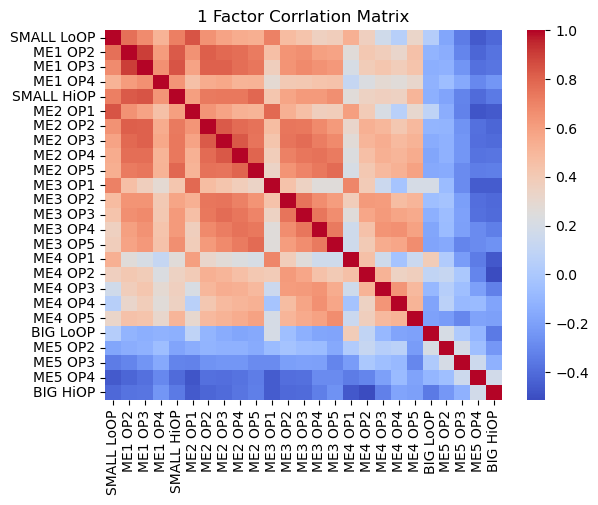

In [58]:
resid_1factor_corr_matrix = resid_1factor.corr()
print("The correlation matrix of residuals for the one factor model is:", resid_1factor_corr_matrix)

sns.heatmap(resid_1factor_corr_matrix, annot=False, cmap='coolwarm')
plt.title('1 Factor Correlation Matrix')
plt.show()

The correlation matrix of residuals for the three factor model is:             SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4  SMALL HiOP   ME2 OP1  \
SMALL LoOP    1.000000  0.091492 -0.117384  0.032287   -0.044709  0.420232   
ME1 OP2       0.091492  1.000000  0.551367  0.132698    0.273002 -0.197875   
ME1 OP3      -0.117384  0.551367  1.000000  0.272287    0.416754 -0.251300   
ME1 OP4       0.032287  0.132698  0.272287  1.000000    0.252676 -0.047472   
SMALL HiOP   -0.044709  0.273002  0.416754  0.252676    1.000000 -0.297624   
ME2 OP1       0.420232 -0.197875 -0.251300 -0.047472   -0.297624  1.000000   
ME2 OP2      -0.279703  0.122853  0.177959 -0.010180   -0.042352 -0.124838   
ME2 OP3      -0.485664  0.003942  0.175433  0.041326    0.007068 -0.247269   
ME2 OP4      -0.510783  0.046075  0.122909 -0.031712    0.104429 -0.380657   
ME2 OP5      -0.427013  0.058824  0.197006  0.049266    0.353928 -0.348067   
ME3 OP1       0.298391 -0.302019 -0.409589 -0.152646   -0.333927  0.510640 

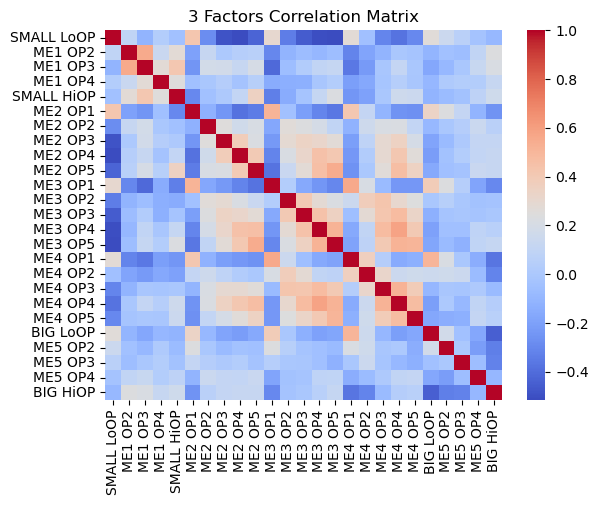

In [59]:
resid_3factors_corr_matrix = resid_3factors.corr()
print("The correlation matrix of residuals for the three factor model is:", resid_3factors_corr_matrix)

sns.heatmap(resid_3factors_corr_matrix, annot=False, cmap='coolwarm')
plt.title('3 Factors Correlation Matrix')
plt.show()

The correlation matrix of residuals for the five factor model is:             SMALL LoOP   ME1 OP2   ME1 OP3   ME1 OP4  SMALL HiOP   ME2 OP1  \
SMALL LoOP    1.000000  0.248343  0.120400  0.158527    0.256462  0.060664   
ME1 OP2       0.248343  1.000000  0.531507  0.108529    0.223255 -0.108662   
ME1 OP3       0.120400  0.531507  1.000000  0.227903    0.324608 -0.026784   
ME1 OP4       0.158527  0.108529  0.227903  1.000000    0.215240  0.081489   
SMALL HiOP    0.256462  0.223255  0.324608  0.215240    1.000000 -0.057190   
ME2 OP1       0.060664 -0.108662 -0.026784  0.081489   -0.057190  1.000000   
ME2 OP2      -0.229011  0.096364  0.124326 -0.048757   -0.117951 -0.018088   
ME2 OP3      -0.372905 -0.063025  0.056323 -0.023506   -0.150065 -0.028121   
ME2 OP4      -0.302896 -0.053872 -0.069374 -0.129788   -0.125847 -0.077026   
ME2 OP5      -0.119520 -0.060473 -0.013013 -0.049517    0.158107  0.058460   
ME3 OP1      -0.154005 -0.252562 -0.242823 -0.043030   -0.109086  0.133473  

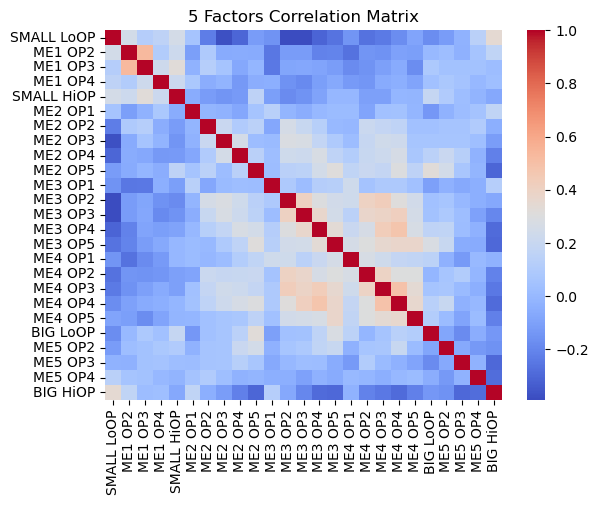

In [60]:
resid_5factors_corr_matrix = resid_5factors.corr()
print("The correlation matrix of residuals for the five factor model is:", resid_5factors_corr_matrix)

sns.heatmap(resid_5factors_corr_matrix, annot=False, cmap='coolwarm')
plt.title('5 Factors Correlation Matrix')
plt.show()

#### 4. Display and comment on the averages of $\vert \alpha_{i} \vert$

In [61]:
print("The average of the different constants for the five factor model is",mean_cst_abs_5factors )

The average of the different constants for the five factor model is 0.20467721006476317


# IV. GRS test (Gibbon, Ross and Shanken (1989)) of frontier efficiency

The GRS test checks whether the constants of the regressions of returns on the factors are simultaneously zero. The null hypothesis of the GRS test is:
$$
H_{0}: \alpha_{i}=0, \forall i=1,...,N
$$

We notice :
    
- $\hat{\alpha}= (\hat{\alpha}_{1},\hat{\alpha}_{2},...,\hat{\alpha}_{N} )'$ the column vector of N $\hat{\alpha}_{i}$
- $f_{t} = (f_{1t}, f_{2t},...,f_{kt})'$ the vector of *k* factors on date *t*
- $\hat{e}_{t} = (\hat{e}_{1t},...,\hat{e}_{Nt})'$ the vector of N residues at date *t*
- $\bar{f} = \frac{1}{T}\sum_{t=1}^{T}f_{t}$ the vector of the empirical means of the factors
- $\hat{\Omega} = \frac{1}{T}\sum_{t=1}^{T}f_{t}f_{t}^{'} - \bar{f}\bar{f }^{'}$ the covariance variance matrix of the factors
- $\hat{\Sigma} = \frac{1}{T-k-1}\sum_{t=1}^{T}e_{t}e_{t}^{'} $
                                                       
The statistic of the test for simultaneous nullity of constants is:

$$\hat{W}=\frac{T(T-N-k)}{N(T-k-1)}(1-\bar{f}^{'}\hat{\Omega}^{-1}\bar{ f})\hat{\alpha}^{'}\hat{\Sigma}^{-1}\hat{\alpha}$$
                                    
Under $H_{0}$ we have $\hat{W} \sim \mathcal{F}(N,T-N-k)$
                                    
#### 1. Programming and execution of the test
Build a function performing the GRS test and apply it to the different sets of factors (1, then 3, then 5 factors)

In [ ]:
def GRS_test(constants, factors, residuals):
    
    import numpy as np
    from scipy.stats import f
    
    T,N = residuals.shape
    k = factors.shaphe[1]
    
    #Calcul of the statistics (empirical means and covariance)
    mean_factors = np.mean(factors)
    mean_resid = np.mean(residuals)
    
    cov_factors = np.cov(factors)
    cov_residuals = np.cov(residuals)
    
    inv_cov_factors = np.inv(cov_factors)
    
    #Calcul of the statistic test
    W_hat = (T * (T - N -k) / N * (T-k-1))* np.dot((1 - np.dot(mean_factors, np.dot(inv_cov_factors,mean_factors))),np.dot(constants.T, np.dot(np.linalg.inv(cov_residuals),constants)))
    
    #Calcul of pvalue
    p_value = 1 - f.cdf(W, N, T - N - k)
    
    return W_hat, p_value
    

#### 2. Test result feedback
Report the test answers for each of the three sets of factors. Is there a set of factors for which the $\alpha_{i}$ are all simultaneously equal to 0?

In [ ]:
W_1factor, p_value_1factor = GRS_test(results_1factor["constant"],factors, resid_1factor)
W_3factors, p_value_3factors = GRS_test(results_3factor["constant"],factors, resid_3factor)
W_5factors, p_value_5factors = GRS_test(results_5factor["constant"],factors, resid_5factor)


if p_value_1factor < 0.05:
    print("We keep the first hypothesis. There is one coefficient different of zero for the one factor model")
elif p_value_3factors < 0.05 : 
    print("We keep the first hypothesis. There is one or more coefficients different of zero for the three factor model")
elif p_value_5factors < 0.05 : 
    print("We keep the first hypothesis. There is one or more coefficients different of zero for the five factor model")
else:
    print("We keep the null hypothesis. The coefficients are supposed to be equal to zero.")

    